In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Torch.det gives different result than np.linalg.det()

In [34]:
mat_dim  = 5    # Dimension of the matrix
num_mat = 100000   # Number of matrixs
multiplier = 1000 # Magify the difference
# Randomize a torch random matrix
random_mat = torch.randn(size=[num_mat, mat_dim, mat_dim],device='cuda',dtype=torch.float64) *  multiplier
random_mat_16 = random_mat.cpu().to(torch.float16).to(torch.float32)
# Multiply the same matrix 
random_mat_squared = torch.matmul(random_mat, torch.transpose(random_mat, -1, -2))
random_mat_squared_16 = torch.matmul(random_mat_16, torch.transpose(random_mat_16, -1, -2))

# The torch way of det
torch_det = torch.det(random_mat_squared).cpu().numpy()
torch_det_np = torch.det(random_mat_squared_16).cpu().numpy()
np_det = np.linalg.det(random_mat_squared.cpu().numpy())
np_det_cpu = np.linalg.det(random_mat_squared_16.cpu().numpy())




In [35]:
print(np.mean(torch_det - np_det))
# Part that is smaller than 0
print('numpy det', np_det[np_det<0])
print('numpy float16 det', np_det_cpu[np_det_cpu<0])
print('torch det', torch_det[torch_det < 0])
print('torch float16 det', torch_det_np[torch_det_np < 0]) #

1.0157973160249464e+16
numpy det []
numpy float16 det [-2.5105004e+24 -3.6545843e+25 -1.3652653e+26 -1.2868828e+24
 -1.5857773e+27 -1.7235145e+25 -4.2653613e+25 -8.0244761e+24
 -4.3615459e+25 -3.1040066e+23 -8.3778488e+24 -9.3024145e+25
 -7.4551208e+24 -5.2585413e+23 -2.9639355e+23 -1.2033905e+26
 -1.4963952e+25 -1.6240108e+25 -1.9964742e+23 -3.7622642e+25
 -1.3459338e+24 -3.9083513e+25 -1.3624185e+25 -6.1715900e+24
 -9.3822296e+24 -1.1380932e+24 -1.5221350e+25 -1.2275876e+26
 -2.3736523e+26 -7.1882010e+24 -1.6301859e+24 -2.8741937e+22
 -6.9248464e+25 -4.6459534e+23 -1.7643250e+24 -2.3750086e+24
 -1.3011766e+25 -8.4848493e+25 -6.0965838e+24 -1.9598629e+26
 -4.7057710e+24]
torch det []
torch float16 det [-3.22133094e+25 -1.50577737e+26 -3.02577840e+27 -1.14026289e+25
 -1.24769546e+25 -1.55251879e+25 -9.57679044e+25 -2.07450268e+24
 -6.26114199e+24 -1.17724944e+26 -1.03204933e+25 -3.17307541e+25
 -1.46237545e+23 -9.60385919e+24 -2.82314551e+25 -2.36818958e+23
 -1.72036122e+25 -4.60323568

Text(0.5, 1.0, 'Determinant of matrix')

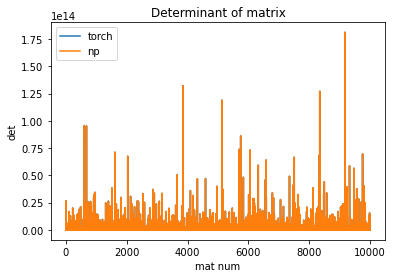

In [26]:
plt.plot(torch_det,label='torch')
plt.plot(np_det,label='np')
plt.legend()
plt.xlabel('mat num')
plt.ylabel('det')
plt.title('Determinant of matrix')
# plt.plot(torch_det - np_det)

(array([8.726e+03, 5.440e+02, 2.500e+02, 1.210e+02, 8.700e+01, 5.300e+01,
        3.200e+01, 3.300e+01, 2.500e+01, 1.800e+01, 1.200e+01, 1.400e+01,
        6.000e+00, 1.100e+01, 9.000e+00, 6.000e+00, 4.000e+00, 5.000e+00,
        6.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

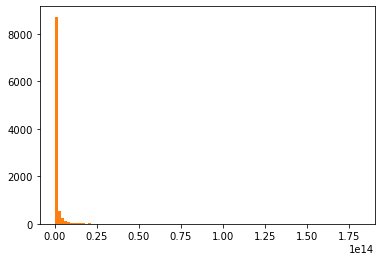

In [27]:
plt.hist(torch_det, bins=100)
plt.hist(torch_det_np, bins=100)

In [28]:
# Part that is smaller than 0
print(np_det[np_det<0])
print(torch_det[torch_det < 0])

[]
[]


Text(0.5, 1.0, 'Difference of Determinant of matrix')

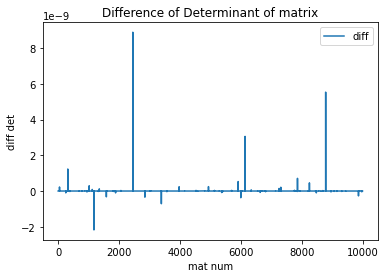

In [29]:
plt.plot((torch_det - np_det)/np_det,label='diff')
# plt.plot(np_det,label='np')
plt.legend()
plt.xlabel('mat num')
plt.ylabel('diff det')
plt.title('Difference of Determinant of matrix')

In [16]:
np.arange(len(np_det))[np.abs((torch_det - np_det)/np_det) > 0.2]

array([3239, 5202, 5795, 6722, 7218, 8040, 8302, 8775, 8864])

In [17]:
np_det[np.abs((torch_det - np_det)/np_det) > 0.2]

array([ 528897.9   , 1598809.9   ,  237864.25  ,   12401.571 ,
       -415615.    , -326292.25  ,  141538.39  ,  343509.56  ,
          1710.8947], dtype=float32)

In [18]:
torch_det[np.abs((torch_det - np_det)/np_det) > 0.2]

array([ 402946.03  , 1198265.9   ,  695737.4   , -846982.25  ,
       -848486.3   ,   -1727.8705,  171823.8   ,  476081.56  ,
        -38534.703 ], dtype=float32)

In [11]:
random_mat_squared[np.abs((torch_det - np_det)/np_det) > 0.2,:,:]

tensor([[[ 9.2427e+02, -1.7619e+02, -3.3338e+02, -2.8708e+02,  5.7720e+02],
         [-1.7619e+02,  7.1884e+02, -1.8188e+02,  6.7533e+02,  7.5713e+01],
         [-3.3338e+02, -1.8188e+02,  2.2629e+02, -1.4647e+02, -2.3721e+02],
         [-2.8708e+02,  6.7533e+02, -1.4647e+02,  7.1487e+02, -3.2040e+00],
         [ 5.7720e+02,  7.5713e+01, -2.3721e+02, -3.2040e+00,  6.8901e+02]],

        [[ 7.5629e+02, -9.1744e+01, -5.2827e+01, -7.8547e+01,  1.8050e+02],
         [-9.1744e+01,  2.6960e+02,  7.2538e+01,  8.8464e+00,  2.2332e+02],
         [-5.2827e+01,  7.2538e+01,  1.0285e+02, -1.3734e+02,  2.1802e+02],
         [-7.8547e+01,  8.8464e+00, -1.3734e+02,  3.8017e+02, -1.7168e+02],
         [ 1.8050e+02,  2.2332e+02,  2.1802e+02, -1.7168e+02,  7.7336e+02]],

        [[ 4.1094e+02,  4.1469e+01, -5.4663e+01,  6.2249e+01,  4.1329e+01],
         [ 4.1469e+01,  3.7650e+02,  1.5556e+02, -3.1500e+02,  3.6442e+01],
         [-5.4663e+01,  1.5556e+02,  1.2860e+03, -2.3784e+02,  5.3225e+02],
        

In [19]:
# a = [[  258.1703,   132.2838,  -205.8789,  -122.1141,   199.0170],
#          [  132.2838,   273.7516,  -114.6584,  -145.0806,  -105.3492],
#          [ -205.8789,  -114.6584,   438.5677,   -49.8952,   -85.7328],
#          [ -122.1141,  -145.0806,   -49.8952,   182.3227,   -35.3548],
#          [  199.0170,  -105.3492,   -85.7328,   -35.3548,   391.0339]]
a = random_mat_squared[6722,:,:].cpu()
print(a)

tensor([[ 224.0501,  147.4713, -320.5299,   21.6467,  -90.0133],
        [ 147.4713,  518.9136, -263.4590, -191.1691, -346.5363],
        [-320.5299, -263.4590, 1003.7292, -558.3171, -113.7530],
        [  21.6467, -191.1691, -558.3171, 1042.7273,  409.7198],
        [ -90.0133, -346.5363, -113.7530,  409.7198,  375.7087]])


In [20]:
#a_torch = torch.tensor(a)
a_np = np.array(a)
print('np det', np.linalg.det(a_np))
print('torch det',torch.det(a))

np det 12401.571
torch det tensor(-809413.2500)


In [21]:
import torch
a = torch.tensor([1.0, 1.0])
b = torch.tensor([3.0, 3.0])

c = torch.stack([a,b], dim = 1)
print(c)
torch.det(c)

tensor([[1., 3.],
        [1., 3.]])


tensor(0.)

In [23]:
a = torch.tensor([2, -1, 1]).float()
b = torch.tensor([3, -4, -2]).float()
c = torch.tensor([5, -10, -8]).float()

d = torch.stack([a,b,c], dim = 1)
print(d)
print(torch.det(d))

tensor([[  2.,   3.,   5.],
        [ -1.,  -4., -10.],
        [  1.,  -2.,  -8.]])
tensor(0.)
